In [4]:
pip install chmod

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement chmod (from versions: none)
ERROR: No matching distribution found for chmod
You should consider upgrading via the 'c:\Users\Ervin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
conda install -p c:\Users\Ervin\miniconda3 ipykernel --update-deps --force-reinstall


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: c:\Users\Ervin\Desktop\Work\Bioinformatics self-projects\Drug Discovery Using Machine Learning & Data Analysis\UsersErvinminiconda3



In [6]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
#loading bioactivity data
df = pd.read_csv("bioactivity_preprocessed_data.csv")

In [3]:
#Calculating Lipinski descriptors
#Use of rule of 5 to evaluate druglikeness (how druglike a substance is with respect to factors such as bioavailability)
#Bioavailibility = extent & rate at which drug is entered into systemic circulation and accessing site of action (determined by properties of dosage form
# - design & manufacture)

#Rule of 5 = absorption, distribution, metabolism & excretion (ADME) = pharmacokinetic profile
#Encapsulated by: Molecular weight < 500 Dalton, Octanol-water partition coefficient (LogP) < 5, Hydrogen bond donors < 5, Hydrogen bond acceptors < 10

In [4]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [5]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
#Calculate descriptors

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [6]:
df_lipinski = lipinski(df.canonical_smiles)

In [7]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,285.200,-0.0332,2.0,8.0
1,289.188,-1.1213,4.0,8.0
2,209.209,-1.2383,3.0,7.0
3,285.200,-0.0332,2.0,8.0
4,209.209,-1.2383,3.0,7.0
5,289.188,-1.1213,4.0,8.0
6,244.207,-3.0115,4.0,8.0
7,261.174,-0.6162,2.0,7.0
8,279.189,-1.6618,4.0,7.0
9,268.248,-0.8199,4.0,7.0


In [8]:
#combining dataframes
df_combined = pd.concat([df, df_lipinski], axis=1)

In [9]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL112159,Nc1ncnc2c1ncn2C[C@H]1COP(=O)(O)CO1,48000.0,inactive,285.200,-0.0332,2.0,8.0
1,CHEMBL113930,Nc1ncnc2c1ncn2C[C@@H](CO)OP(=O)(O)O,22000.0,inactive,289.188,-1.1213,4.0,8.0
2,CHEMBL494759,Nc1ncnc2c1ncn2C[C@H](O)CO,54000.0,inactive,209.209,-1.2383,3.0,7.0
3,CHEMBL114867,Nc1ncnc2c1ncn2C[C@@H]1COP(=O)(O)CO1,350000.0,inactive,285.200,-0.0332,2.0,8.0
4,CHEMBL321500,Nc1ncnc2c1ncn2C[C@@H](O)CO,500000.0,inactive,209.209,-1.2383,3.0,7.0
5,CHEMBL326139,Nc1ncnc2c1ncn2C[C@H](CO)OP(=O)(O)O,300000.0,inactive,289.188,-1.1213,4.0,8.0
6,CHEMBL1643,NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)n1,145000.0,inactive,244.207,-3.0115,4.0,8.0
7,CHEMBL392630,Nc1ccn(C[C@H]2COP(=O)(O)CO2)c(=O)n1,760000.0,inactive,261.174,-0.6162,2.0,7.0
8,CHEMBL152,Nc1ccn(C[C@@H](CO)OCP(=O)(O)O)c(=O)n1,505000.0,inactive,279.189,-1.6618,4.0,7.0
9,CHEMBL3290663,Nc1ncc(F)c2c1ncn2[C@@H]1C[C@H](O)[C@@H](O)[C@H]1O,320.0,active,268.248,-0.8199,4.0,7.0


In [10]:
#converting IC50 to pIC50 using logarathmic scale -log10(IC50)
#using standard_value column
#remove standard_value column after pIC50 column is created

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [11]:
df_combined.standard_value.describe()
#no values above 100,000,000 in dataset, but range is large

count        12.000000
mean     223746.666667
std      256036.832767
min         320.000000
25%       16580.000000
50%       99500.000000
75%      387500.000000
max      760000.000000
Name: standard_value, dtype: float64

In [12]:
#In cases of values >100,000,000, values larger than 100,000,000 are restricted to 100,000,000
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [13]:
df_norm = norm_value(df_combined)
df_norm

C:\Users\Ervin\AppData\Local\Temp\ipykernel_14068\584910051.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL112159,Nc1ncnc2c1ncn2C[C@H]1COP(=O)(O)CO1,inactive,285.200,-0.0332,2.0,8.0,48000.0
1,CHEMBL113930,Nc1ncnc2c1ncn2C[C@@H](CO)OP(=O)(O)O,inactive,289.188,-1.1213,4.0,8.0,22000.0
2,CHEMBL494759,Nc1ncnc2c1ncn2C[C@H](O)CO,inactive,209.209,-1.2383,3.0,7.0,54000.0
3,CHEMBL114867,Nc1ncnc2c1ncn2C[C@@H]1COP(=O)(O)CO1,inactive,285.200,-0.0332,2.0,8.0,350000.0
4,CHEMBL321500,Nc1ncnc2c1ncn2C[C@@H](O)CO,inactive,209.209,-1.2383,3.0,7.0,500000.0
5,CHEMBL326139,Nc1ncnc2c1ncn2C[C@H](CO)OP(=O)(O)O,inactive,289.188,-1.1213,4.0,8.0,300000.0
6,CHEMBL1643,NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)n1,inactive,244.207,-3.0115,4.0,8.0,145000.0
7,CHEMBL392630,Nc1ccn(C[C@H]2COP(=O)(O)CO2)c(=O)n1,inactive,261.174,-0.6162,2.0,7.0,760000.0
8,CHEMBL152,Nc1ccn(C[C@@H](CO)OCP(=O)(O)O)c(=O)n1,inactive,279.189,-1.6618,4.0,7.0,505000.0
9,CHEMBL3290663,Nc1ncc(F)c2c1ncn2[C@@H]1C[C@H](O)[C@@H](O)[C@H]1O,active,268.248,-0.8199,4.0,7.0,320.0


In [14]:
df_norm.standard_value_norm.describe()

count        12.000000
mean     223746.666667
std      256036.832767
min         320.000000
25%       16580.000000
50%       99500.000000
75%      387500.000000
max      760000.000000
Name: standard_value_norm, dtype: float64

In [15]:
df_final = pIC50(df_norm)
df_final

C:\Users\Ervin\AppData\Local\Temp\ipykernel_14068\2623981964.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL112159,Nc1ncnc2c1ncn2C[C@H]1COP(=O)(O)CO1,inactive,285.200,-0.0332,2.0,8.0,4.318759
1,CHEMBL113930,Nc1ncnc2c1ncn2C[C@@H](CO)OP(=O)(O)O,inactive,289.188,-1.1213,4.0,8.0,4.657577
2,CHEMBL494759,Nc1ncnc2c1ncn2C[C@H](O)CO,inactive,209.209,-1.2383,3.0,7.0,4.267606
3,CHEMBL114867,Nc1ncnc2c1ncn2C[C@@H]1COP(=O)(O)CO1,inactive,285.200,-0.0332,2.0,8.0,3.455932
4,CHEMBL321500,Nc1ncnc2c1ncn2C[C@@H](O)CO,inactive,209.209,-1.2383,3.0,7.0,3.301030
5,CHEMBL326139,Nc1ncnc2c1ncn2C[C@H](CO)OP(=O)(O)O,inactive,289.188,-1.1213,4.0,8.0,3.522879
6,CHEMBL1643,NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)n1,inactive,244.207,-3.0115,4.0,8.0,3.838632
7,CHEMBL392630,Nc1ccn(C[C@H]2COP(=O)(O)CO2)c(=O)n1,inactive,261.174,-0.6162,2.0,7.0,3.119186
8,CHEMBL152,Nc1ccn(C[C@@H](CO)OCP(=O)(O)O)c(=O)n1,inactive,279.189,-1.6618,4.0,7.0,3.296709
9,CHEMBL3290663,Nc1ncc(F)c2c1ncn2[C@@H]1C[C@H](O)[C@@H](O)[C@H]1O,active,268.248,-0.8199,4.0,7.0,6.494850


In [16]:
df_final.pIC50.describe()

count    12.000000
mean      4.438572
std       1.323872
min       3.119186
25%       3.417206
50%       4.053119
75%       5.116895
max       6.494850
Name: pIC50, dtype: float64

In [17]:
#Removing intermediate bioactivity class from dataset
#allows for more simple comparisons between active/inactive
df_final.rename(columns= {'0':'bioactivity_class'}, inplace=True)
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL112159,Nc1ncnc2c1ncn2C[C@H]1COP(=O)(O)CO1,inactive,285.200,-0.0332,2.0,8.0,4.318759
1,CHEMBL113930,Nc1ncnc2c1ncn2C[C@@H](CO)OP(=O)(O)O,inactive,289.188,-1.1213,4.0,8.0,4.657577
2,CHEMBL494759,Nc1ncnc2c1ncn2C[C@H](O)CO,inactive,209.209,-1.2383,3.0,7.0,4.267606
3,CHEMBL114867,Nc1ncnc2c1ncn2C[C@@H]1COP(=O)(O)CO1,inactive,285.200,-0.0332,2.0,8.0,3.455932
4,CHEMBL321500,Nc1ncnc2c1ncn2C[C@@H](O)CO,inactive,209.209,-1.2383,3.0,7.0,3.301030
5,CHEMBL326139,Nc1ncnc2c1ncn2C[C@H](CO)OP(=O)(O)O,inactive,289.188,-1.1213,4.0,8.0,3.522879
6,CHEMBL1643,NC(=O)c1ncn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)n1,inactive,244.207,-3.0115,4.0,8.0,3.838632
7,CHEMBL392630,Nc1ccn(C[C@H]2COP(=O)(O)CO2)c(=O)n1,inactive,261.174,-0.6162,2.0,7.0,3.119186
8,CHEMBL152,Nc1ccn(C[C@@H](CO)OCP(=O)(O)O)c(=O)n1,inactive,279.189,-1.6618,4.0,7.0,3.296709
9,CHEMBL3290663,Nc1ncc(F)c2c1ncn2[C@@H]1C[C@H](O)[C@@H](O)[C@H]1O,active,268.248,-0.8199,4.0,7.0,6.494850


In [34]:
df_2class.to_csv("MonkeyPox_bioactivity_data_pIC50", index=False)

In [19]:
#Exploratory data analysis (chemical space analysis)
#creating a constellation plot - active molecule is relatively larger size than less active molecules
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

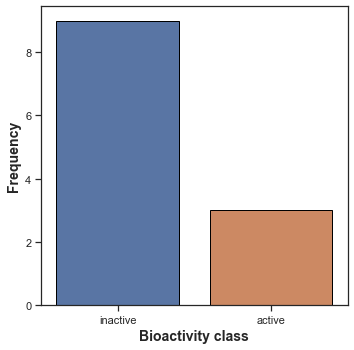

In [20]:
#frequency plot of 2 bioactivity classes
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

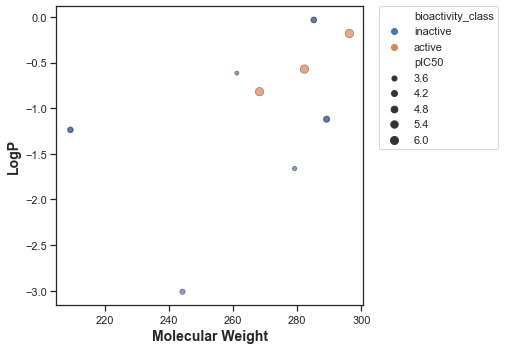

In [21]:
#scatter plot of Molecular weight - LogP

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('Molecular Weight', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

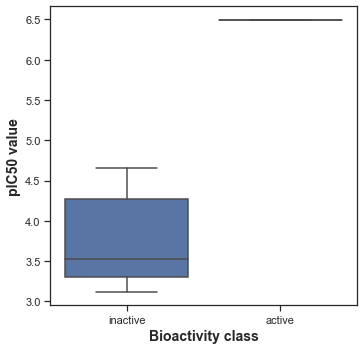

In [22]:
#Box plot of pIC50 values
#all active classes have the same value
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [23]:
# Mann-Whitney U Test - to see difference between two bioactivity classes
# null = distribution of both is equal
# alternative = distributions are not equal
# question - is there a statistical significance between the pIC50?

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [24]:
mannwhitney('pIC50')
#There is a statistical significance of distribution difference between active and inactive pIC50

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,27.0,0.015491,0.05,Different distribution (reject H0)


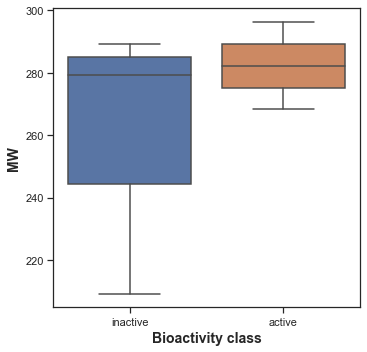

In [25]:
#Now to test significant difference between the other Lepinsky descriptors used
#Box plot of Molecular Weight (MW) values

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [26]:
mannwhitney('MW')
#There is not a statistical significance of distribution difference between active and inactive MW

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,18.0,0.457173,0.05,Same distribution (fail to reject H0)


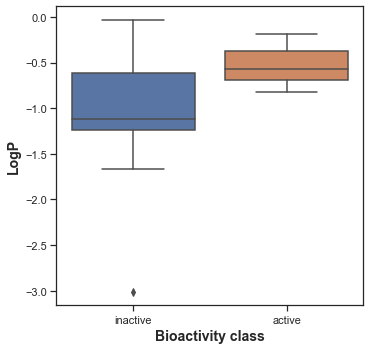

In [27]:
#Box plot of LogP (Octanol-water partition coefficient) values

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [28]:
mannwhitney('LogP')
#There is not a statistical significance of distribution difference between active and inactive LogP

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,20.0,0.264737,0.05,Same distribution (fail to reject H0)


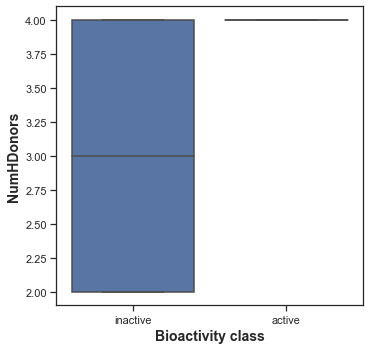

In [29]:
#Box plot of Molecular Weight NumHDonors (number of hydrogen donors)
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [30]:
mannwhitney('NumHDonors')
#There is not a statistical significance of distribution difference between active and inactive NumHDonors

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,21.0,0.144499,0.05,Same distribution (fail to reject H0)


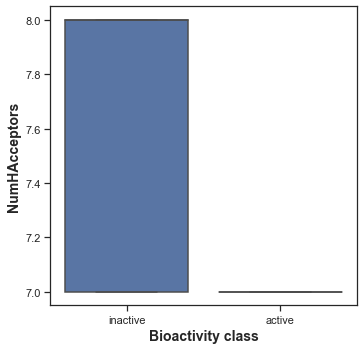

In [31]:
#Box plot of Molecular Weight NumHAcceptors (number of hydrogen acceptors)

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [32]:
mannwhitney('NumHAcceptors')
#There is not a statistical significance of distribution difference between active and inactive NumHAcceptors

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,6.0,0.130927,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All 4 of the Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors) did not show a **statistical difference** betweenthe **actives** and **inactives**.

In [33]:
! zip -r results.zip . -i *.csv *.pdf

updating: bioactivity_data.csv (188 bytes security) (deflated 82%)
updating: bioactivity_preprocessed_data.csv (188 bytes security) (deflated 68%)
updating: mannwhitneyu_LogP.csv (188 bytes security) (deflated 7%)
updating: mannwhitneyu_MW.csv (188 bytes security) (deflated 7%)
updating: mannwhitneyu_NumHAcceptors.csv (188 bytes security) (deflated 9%)
updating: mannwhitneyu_NumHDonors.csv (188 bytes security) (deflated 9%)
updating: mannwhitneyu_pIC50.csv (188 bytes security) (deflated 10%)
updating: plot_bioactivity_class.pdf (188 bytes security) (deflated 40%)
updating: plot_ic50.pdf (188 bytes security) (deflated 39%)
updating: plot_LogP.pdf (188 bytes security) (deflated 40%)
updating: plot_MW.pdf (188 bytes security) (deflated 40%)
updating: plot_MW_vs_LogP.pdf (188 bytes security) (deflated 33%)
updating: plot_NumHAcceptors.pdf (188 bytes security) (deflated 40%)
updating: plot_NumHDonors.pdf (188 bytes security) (deflated 40%)
